# Matplotlib

In preparing for this session I found a wonderful blog post online that explains this great detail, so a lot of what you're about to see comes from that post. I will instead focus a little more on importing chemical data ourselves and plotting that.

The blog post is called [Pyplot vs Object Oriented Interface](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/) by Tejas Sanap

## Two ways of doing things

There are two main ways of using matplotlib: through pyplot (intended to mimic MATLAB); and through an object oriented interface (much more versatile)

### Generating some data

In [7]:
import numpy as np

time = np.arange(0., 10., 0.2)
velocity = np.zeros_like(time, dtype=float)
distance = np.zeros_like(time, dtype=float)

g = 9.8 	# m/s^2

velocity = g * time
distance = 0.5 * g * np.power(time, 2)

### 1. pyplot

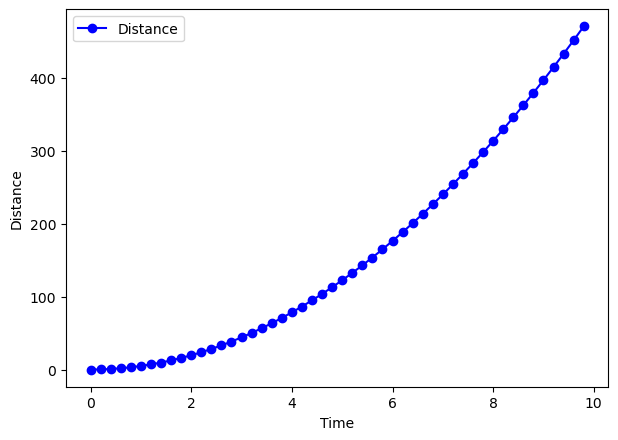

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5), dpi=100)
plt.plot(time,distance,'bo-')
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend(["Distance"])
plt.grid(False)

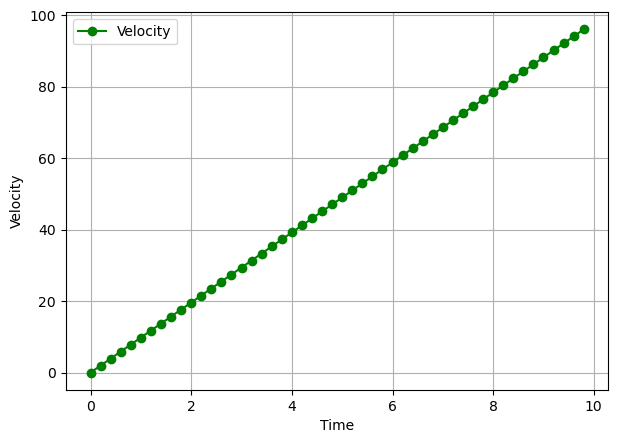

In [9]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(time, velocity,'go-')
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend(["Velocity"])
plt.grid(True)

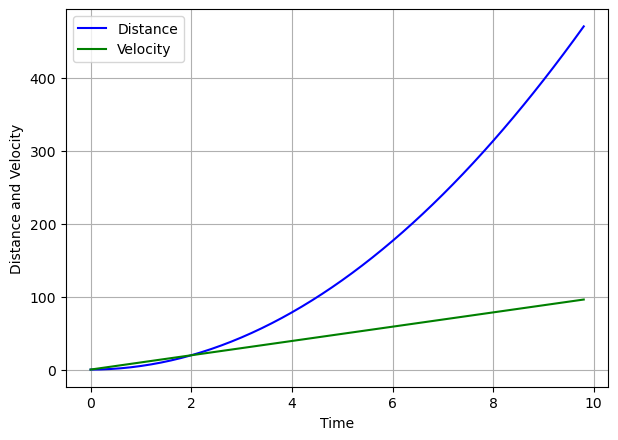

In [31]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(time, distance,'b-')
plt.plot(time, velocity,'g-')
plt.ylabel("Distance and Velocity")
plt.xlabel("Time")
plt.legend(["Distance", "Velocity"])
plt.grid(True)
plt.show()

### 2. object oriented

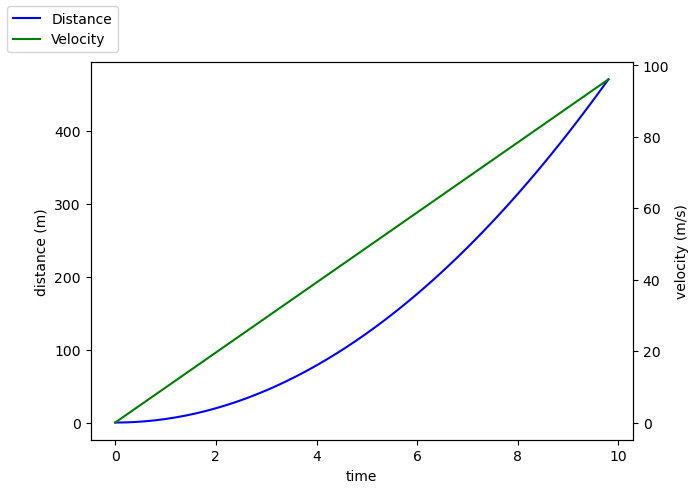

In [41]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("distance (m)")
ax1.set_xlabel("time")
ax1.plot(time, distance, "blue")

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis


ax2.set_ylabel("velocity (m/s)")
ax2.set_xlabel("time")
ax2.plot(time, velocity, "green")

fig.legend(["Distance", "Velocity"], loc=2)

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()
fig.savefig('dist-vs-velo.pdf')

## Using our own data

In [16]:
import pandas as pd

data = pd.read_csv('3d-water-plot.csv')
data

,a1,r1,r2,E
0,100.00,0.9000,0.9000,-76.332954
1,100.00,0.9001,0.9001,-76.332985
2,100.00,0.9002,0.9002,-76.333015
3,100.00,0.9003,0.9003,-76.333046
4,100.00,0.9004,0.9004,-76.333080
...,...,...,...,...
499995,104.99,0.9995,0.9995,-76.339770
499996,104.99,0.9996,0.9996,-76.339750
499997,104.99,0.9997,0.9997,-76.339745
499998,104.99,0.9998,0.9998,-76.339730


In [17]:
water_curve = data.loc[data['a1'] == 100.00]
water_curve

,a1,r1,r2,E
0,100.0,0.9000,0.9000,-76.332954
1,100.0,0.9001,0.9001,-76.332985
2,100.0,0.9002,0.9002,-76.333015
3,100.0,0.9003,0.9003,-76.333046
4,100.0,0.9004,0.9004,-76.333080
...,...,...,...,...
995,100.0,0.9995,0.9995,-76.339720
996,100.0,0.9996,0.9996,-76.339710
997,100.0,0.9997,0.9997,-76.339700
998,100.0,0.9998,0.9998,-76.339680


In [42]:
#x = np.array(water_curve['r1'])
#y = np.array(water_curve['E'])

x = water_curve['r1']
y = water_curve['E']

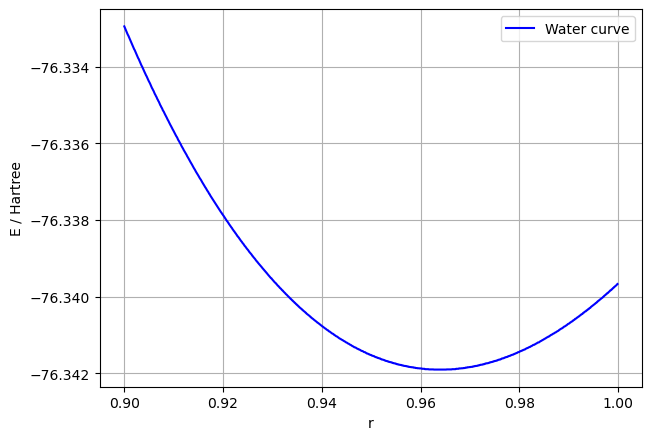

In [43]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(x,y,'b-')
plt.xlabel("r")
plt.ylabel("E / Hartree")
plt.legend(["Water curve"])
plt.grid(True)

We can also plot the whole 3D surface if we like

/var/folders/f8/55mrb5910zx23z736fmfwct00000gn/T/ipykernel_48351/1510872407.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


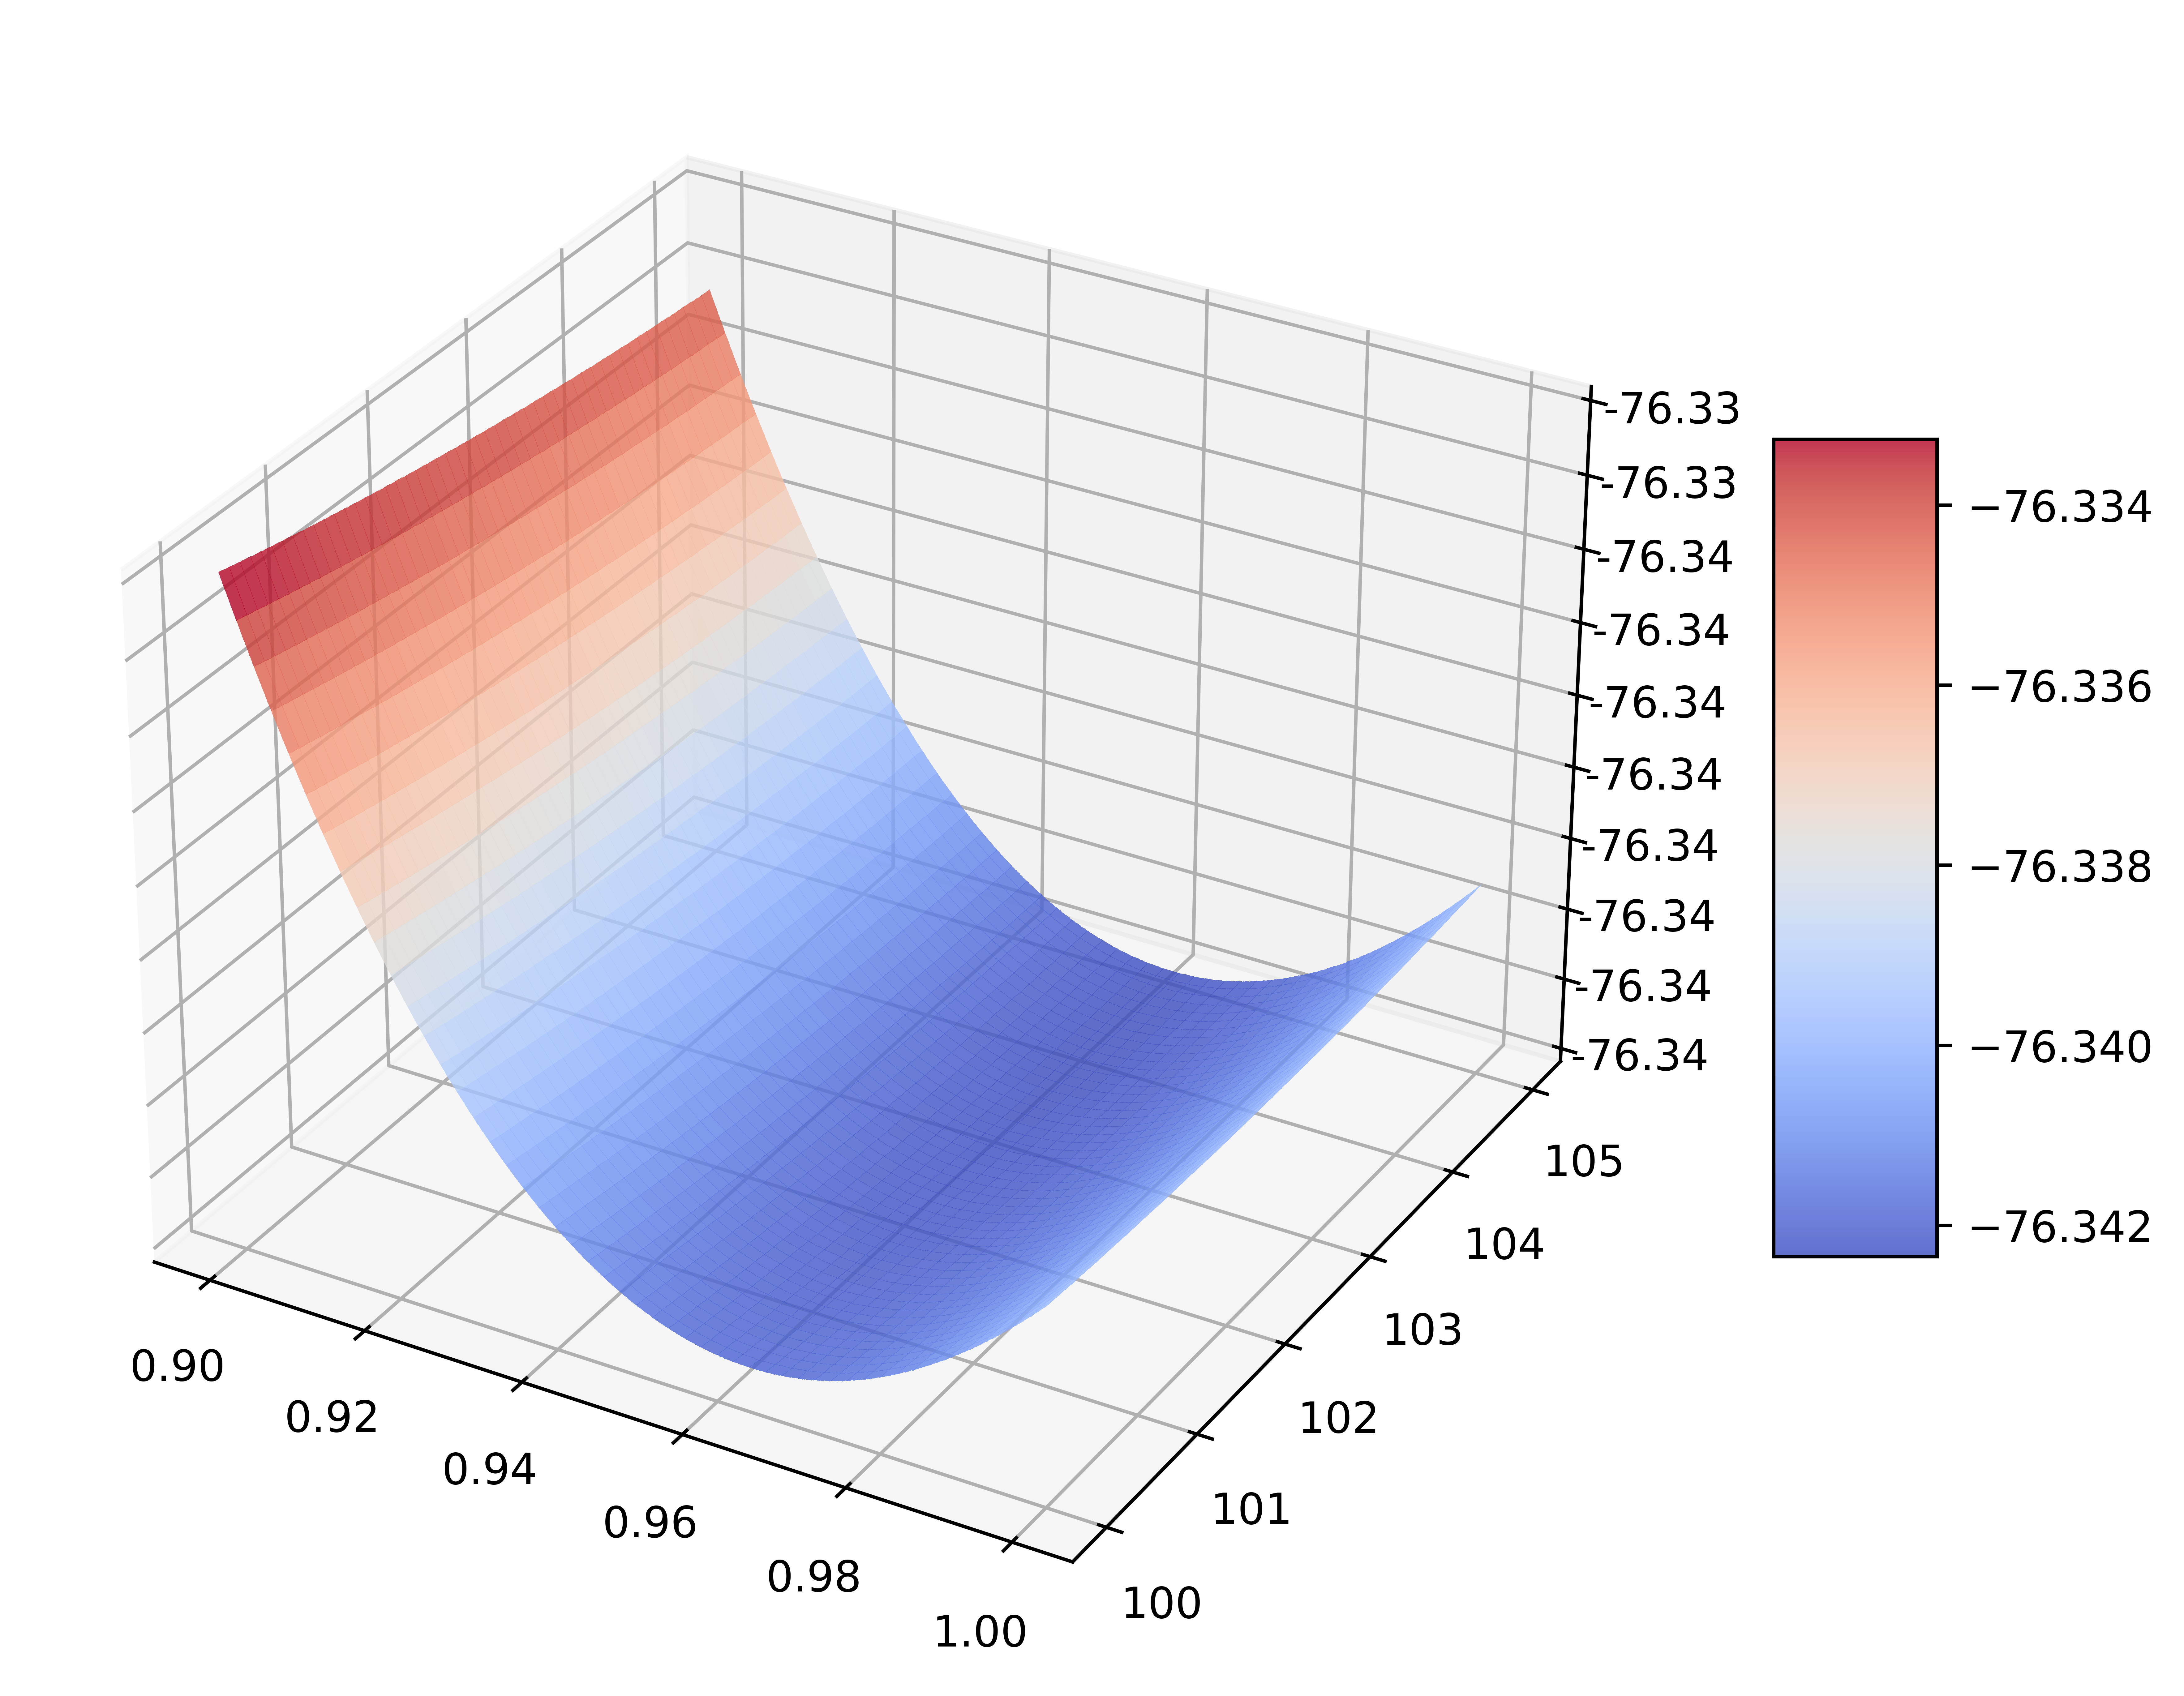

In [26]:
from scipy.interpolate import griddata
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_pes(data, filename):
    plot_dataset = data
   
    x = np.array(plot_dataset['r2'])
    y = np.array(plot_dataset['a1'])
    x_unique = np.sort(list(set(x)))
    y_unique = np.sort(list(set(y)))
    z = np.array(plot_dataset['E'])

    x, y = np.meshgrid(x_unique, y_unique)
    z = griddata((plot_dataset['r2'], plot_dataset['a1']), plot_dataset['E'], (x, y), method='cubic')

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, shade=True, alpha=0.8)
    #ax.set_zlim(np.min(z), -150.2)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    fig.set_size_inches(9,7)
    fig.set_dpi(1000)
    fig.savefig(f'{filename}_generated_pes.pdf', dpi=1000)
    plt.show()

plot_pes(data, filename="test")